In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context(context="paper", font_scale=1.5, rc=None)
sns.set(font="serif")
import seaborn

import geopandas as gpd
import matplotlib.pyplot as plt

import libpysal
from libpysal  import weights
from pysal.explore import esda 
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster
from splot.libpysal import plot_spatial_weights

from giddy.directional import Rose
import os

from numpy.random import seed
seed(12345)

os.chdir('F:/projects/2024/informal')

In [5]:
informal = pd.read_csv("F:/projects/2024/informal/results/informal_spatial.csv", encoding='unicode_escape')

geojson_data = gpd.read_file("F:/projects/2024/informal/TUR_ADM1.geojson")

merged_data = pd.merge(geojson_data, informal, how='left', left_on='asdf_id', right_on='asdf_id')

C:\Users\uursavas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


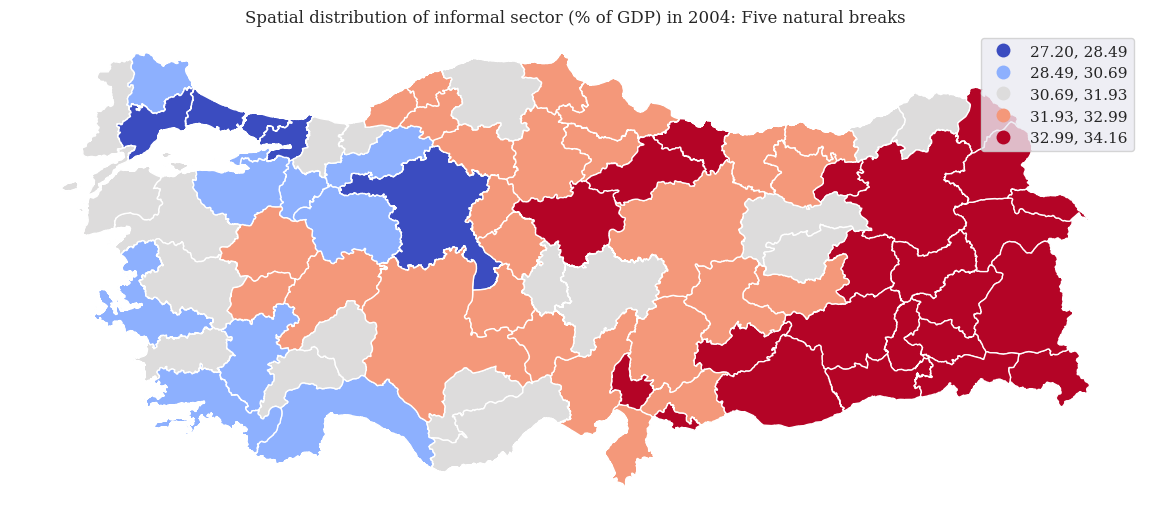

In [6]:
fig, ax = plt.subplots(figsize=(12,8))
merged_data.plot(column="2004", scheme='NaturalBreaks', k=5, cmap='coolwarm', legend=True, ax=ax)
plt.title('Spatial distribution of informal sector (% of GDP) in 2004: Five natural breaks')
plt.tight_layout()
ax.axis("off")
plt.show()

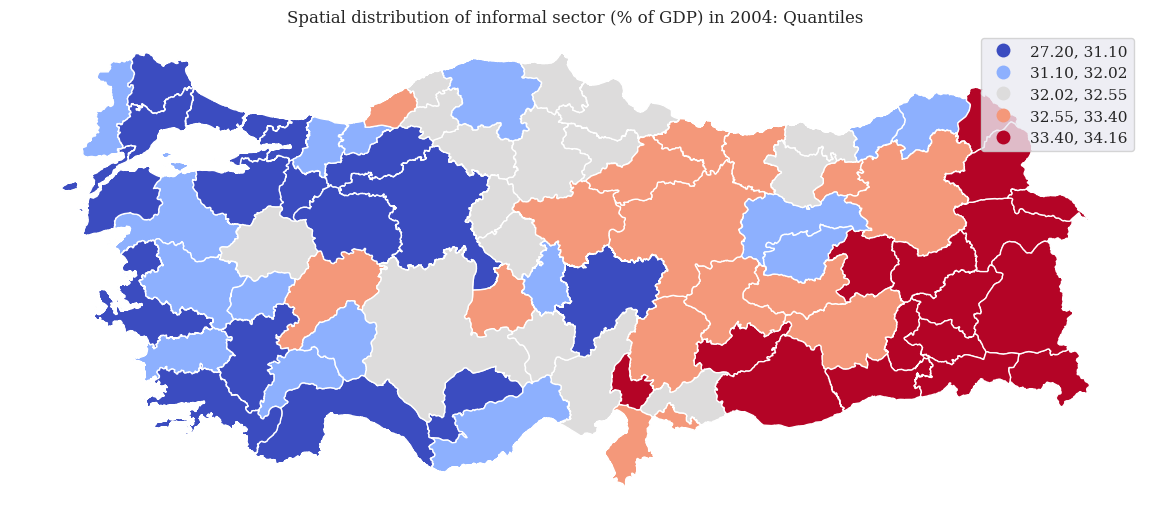

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
merged_data.plot(column="2004", scheme='Quantiles',  cmap='coolwarm', legend=True, ax=ax)
plt.title('Spatial distribution of informal sector (% of GDP) in 2004: Quantiles')
plt.tight_layout()
ax.axis("off")
plt.show()

C:\Users\uursavas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


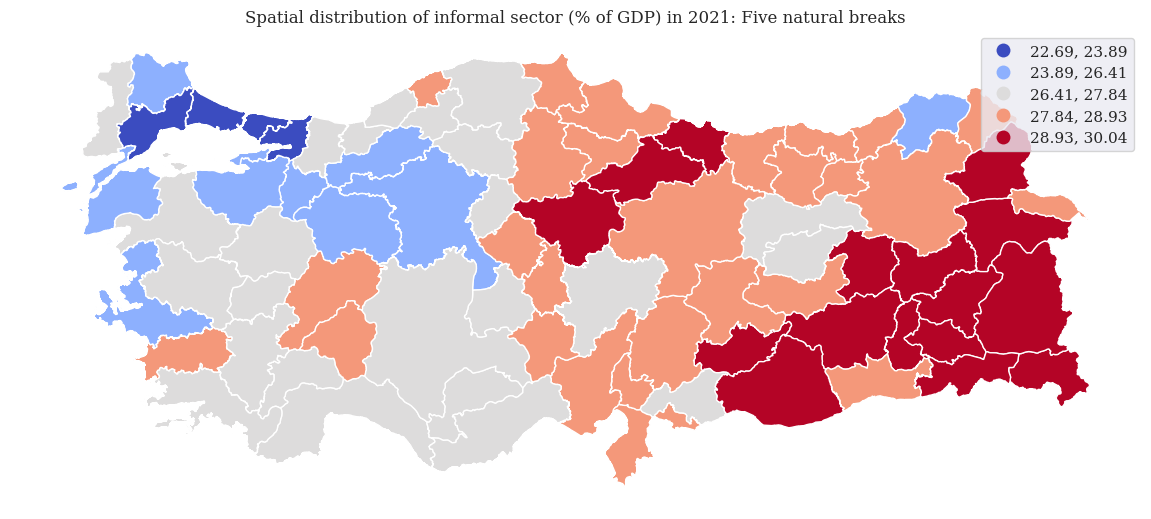

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
merged_data.plot(column="2021", scheme='NaturalBreaks', k=5, cmap='coolwarm', legend=True, ax=ax)
plt.title('Spatial distribution of informal sector (% of GDP) in 2021: Five natural breaks')
plt.tight_layout()
ax.axis("off")
plt.show()

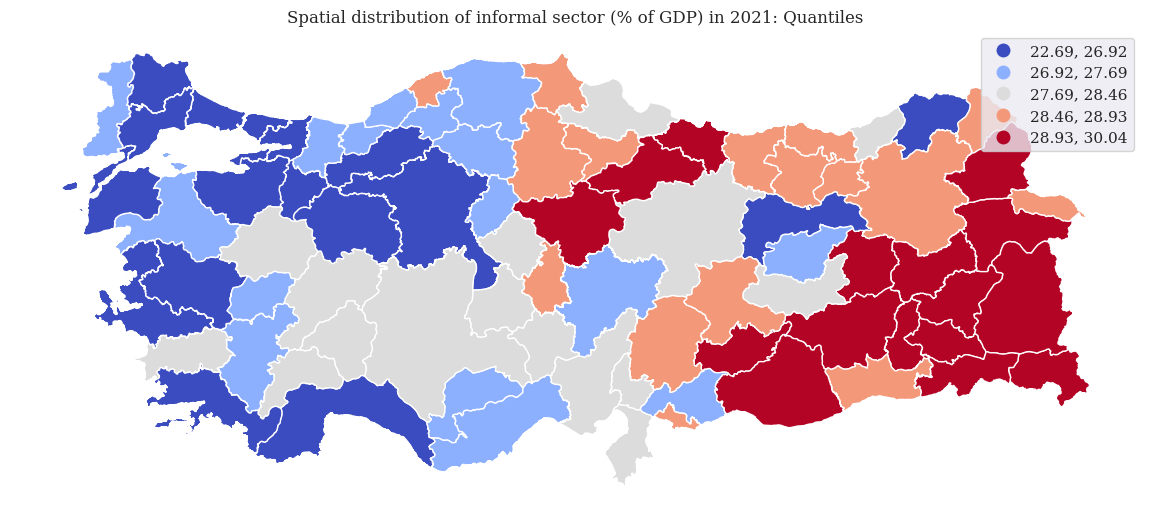

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
merged_data.plot(column="2021", scheme='Quantiles',  cmap='coolwarm', legend=True, ax=ax)
plt.title('Spatial distribution of informal sector (% of GDP) in 2021: Quantiles')
plt.tight_layout()
ax.axis("off")
plt.show()

C:\Users\uursavas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\uursavas\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


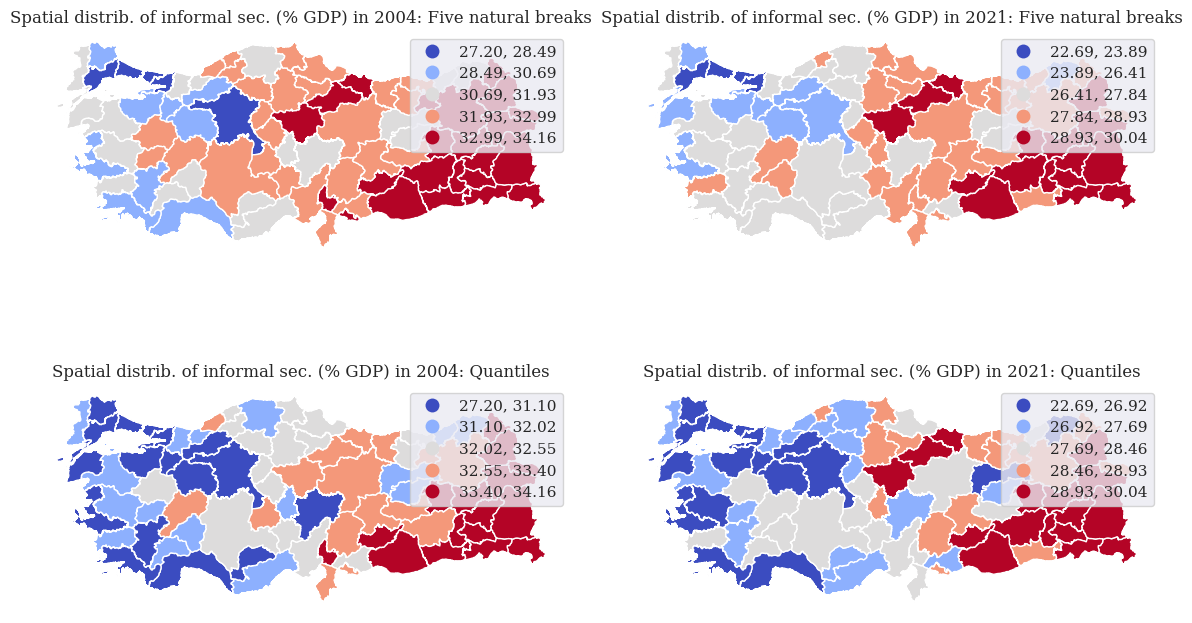

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
merged_data.plot(column="2004", scheme='NaturalBreaks', k=5, cmap='coolwarm', legend=True, ax=axes[0,0])
merged_data.plot(column="2021", scheme='NaturalBreaks', k=5, cmap='coolwarm', legend=True, ax=axes[0,1])
merged_data.plot(column="2004", scheme='Quantiles',  cmap='coolwarm', legend=True, ax=axes[1,0])
merged_data.plot(column="2021", scheme='Quantiles',  cmap='coolwarm', legend=True, ax=axes[1,1])
plt.tight_layout()
axes[0,0].axis("off")
axes[0,1].axis("off")
axes[1,0].axis("off")
axes[1,1].axis("off")

axes[0,0].title.set_text('Spatial distrib. of informal sec. (% GDP) in 2004: Five natural breaks')
axes[0,1].title.set_text('Spatial distrib. of informal sec. (% GDP) in 2021: Five natural breaks')
axes[1,0].title.set_text('Spatial distrib. of informal sec. (% GDP) in 2004: Quantiles')
axes[1,1].title.set_text('Spatial distrib. of informal sec. (% GDP) in 2021: Quantiles')
plt.show()

In [ ]:
### Spatial weights matrix and spatial lag

In [14]:
# Load weights matrix
w_queen = weights.contiguity.Queen.from_dataframe(merged_data)


# Row-standardize weights matrix
w_queen.transform = "R"

C:\Users\uursavas\AppData\Local\Temp\ipykernel_19752\3796823966.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w_queen = weights.contiguity.Queen.from_dataframe(merged_data)


In [15]:
# Create spatial lag variables
merged_data["w_2004"] = weights.lag_spatial(w_queen, merged_data["2004"])
merged_data["w_2021"] = weights.lag_spatial(w_queen, merged_data["2021"])

In [16]:
merged_data[["2004", "w_2004", "2021", "w_2021"]]

,2004,w_2004,2021,w_2021
0,32.246507,32.285411,27.963184,27.976770
1,33.744531,32.976798,29.467049,28.881355
2,32.554150,31.500792,28.388501,27.414615
3,34.154317,33.724340,30.042331,29.336063
4,32.385330,32.815203,28.537311,28.871858
...,...,...,...,...
76,30.397265,28.646569,25.600179,24.339981
77,33.064559,32.355686,29.061970,28.332046
78,32.795890,31.436861,27.468281,27.367597
79,33.526188,33.762620,28.986277,29.301213


In [17]:
## Spatial autocorrelation

In [18]:
x2004 = merged_data["2004"]
x2021 = merged_data["2021"]

In [19]:
moran2004 = Moran(x2004, w_queen)
moran2021 = Moran(x2021, w_queen)

In [20]:
print(moran2004.I, moran2021.I)

print(moran2004.p_sim, moran2021.p_sim)

0.6673411138948363 0.6516556145477524
0.001 0.001


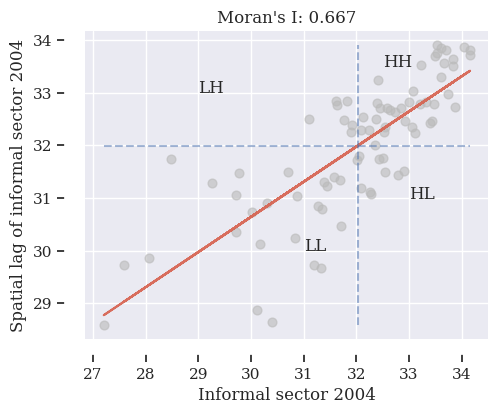

In [21]:
fig, ax = plt.subplots(figsize=(6,4))
moran_scatterplot(moran2004, zstandard=False, ax = ax)
ax.set_xlabel("Informal sector 2004")
ax.set_ylabel("Spatial lag of informal sector 2004")
ax.set_title("Moran's I: 0.667")

ax.text(31,30, 'LL')
ax.text(32.5,33.5, 'HH')
ax.text(33,31, 'HL')
ax.text(29,33, 'LH')


plt.show()

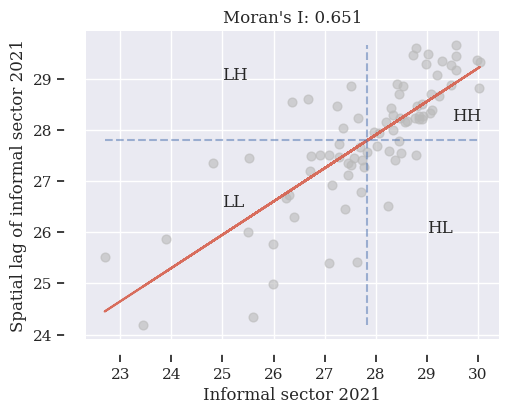

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
moran_scatterplot(moran2021, zstandard=False, ax = ax)
ax.set_xlabel("Informal sector 2021")
ax.set_ylabel("Spatial lag of informal sector 2021")
ax.set_title("Moran's I: 0.651")

ax.text(25,26.5, 'LL')
ax.text(29.5,28.2, 'HH')
ax.text(29,26, 'HL')
ax.text(25,29, 'LH')


plt.show()

In [ ]:
#Evolution of spatial dependence

In [23]:
# Create multidimentional array
dfa = merged_data.loc[:,'2004':'2021'].values
dfa

array([[32.24650724, 31.68800442, 31.1363712 , ..., 28.03218968,
        27.96208341, 27.96318404],
       [33.74453059, 33.17080523, 32.58001702, ..., 29.37008434,
        29.40589497, 29.46704928],
       [32.55414979, 32.06300928, 31.46635918, ..., 28.10038133,
        28.12354415, 28.3885011 ],
       ...,
       [32.7958902 , 32.16115138, 31.45265665, ..., 28.05074082,
        27.83310122, 27.46828148],
       [33.52618756, 33.04539777, 32.4438166 , ..., 28.94672984,
        28.86962828, 28.98627677],
       [33.60529683, 33.15259018, 32.63714094, ..., 29.88145291,
        29.92967381, 30.03005795]])

In [24]:
# Create array of years
years = np.arange(2004,2022)
years

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [25]:
mits = [Moran(cs, w_queen) for cs in dfa.T]
res = np.array([(m.I, m.EI, m.p_sim, m.z_sim) for m in mits])

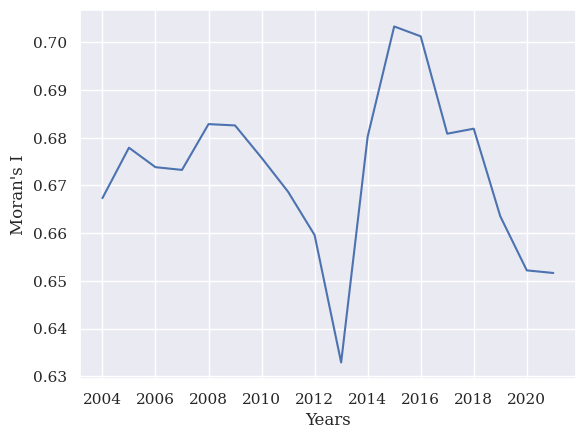

In [26]:

plt.plot(years, res[:, 0])

# Set integer ticks on the x-axis
plt.xticks(years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Add labels
plt.xlabel("Years")
plt.ylabel("Moran's I")

# Show the plot
plt.show()

In [ ]:
### Evolution of regional disparities

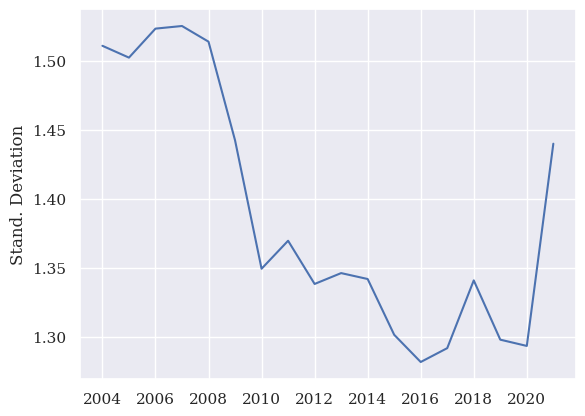

In [27]:
sigma = dfa.std(axis=0)
plt.plot(years, sigma)
plt.xticks(years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
#plt.title("Sigma Convergence")
plt.ylabel('Stand. Deviation');

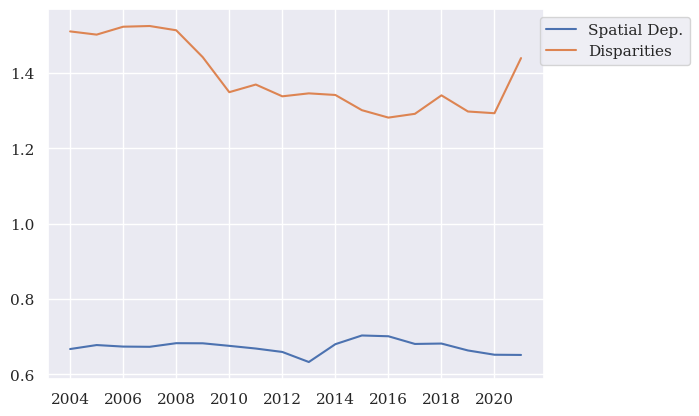

In [28]:
plt.plot(years, res[:,0], label="Spatial Dep.")
plt.plot(years, sigma,  label="Disparities")
plt.xticks(years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend(bbox_to_anchor=(1.31,1), loc="upper right");

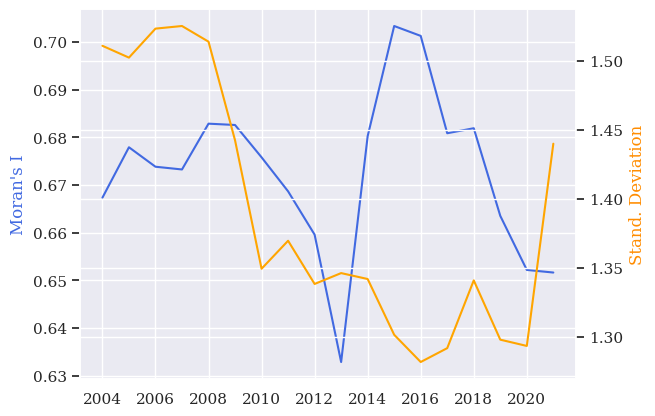

In [29]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, res[:,0], color="royalblue")
# set y-axis label
ax.set_ylabel("Moran's I", color="royalblue")
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, sigma, color="orange")
ax2.set_ylabel("Stand. Deviation", color="darkorange")
plt.xticks(years)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

In [28]:
## LISA scatterplot and map

In [30]:
Lmoran2004 = Moran_Local(x2004, w_queen)
Lmoran2021 = Moran_Local(x2021, w_queen)

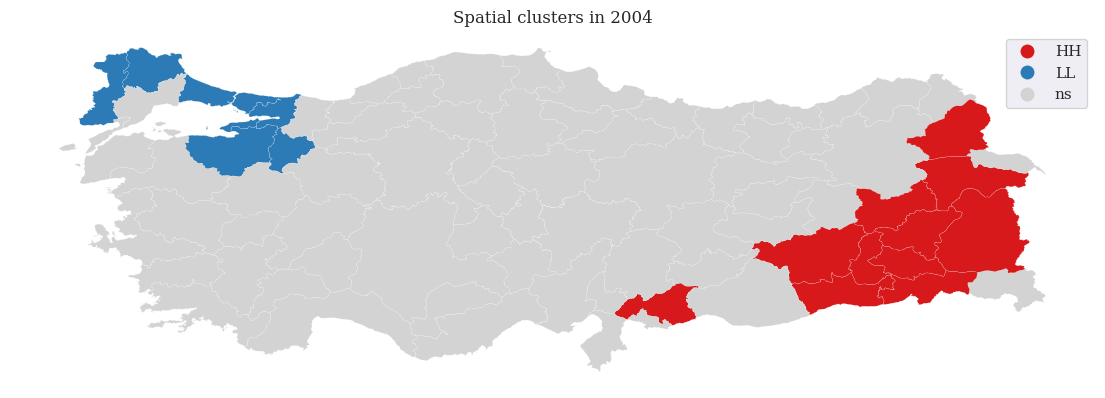

In [31]:
# Plot LISA map
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(Lmoran2004, merged_data, p=0.01, figsize = (16,12),ax=ax)
plt.title('Spatial clusters in 2004')
plt.show()

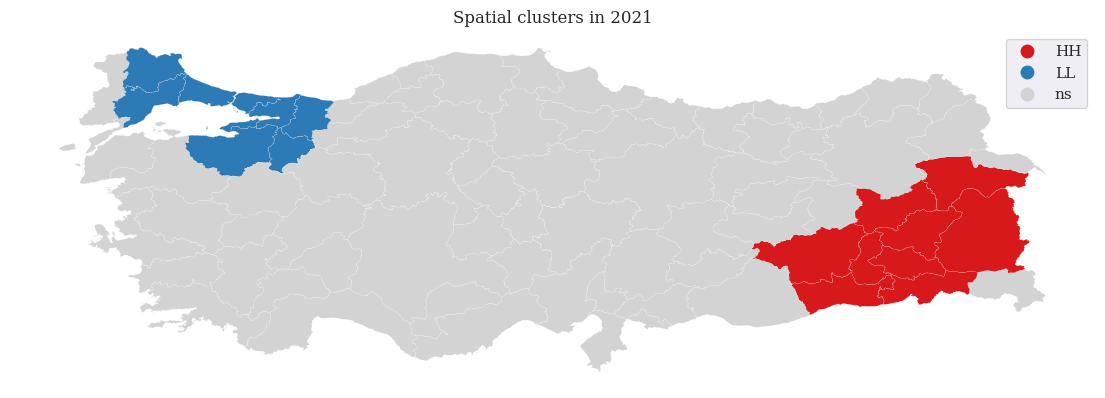

In [32]:
# Plot LISA map
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(Lmoran2021, merged_data, p=0.01, figsize = (16,12),ax=ax)
plt.title('Spatial clusters in 2021')
plt.show()